In [1]:
import pandas as pd
df=pd.read_csv(r"option_calc_years.csv")
df.head()

,id,option_calculation_id,year,total_savings,cumulative_cash_flow,created_at,updated_at,energy_cost,maintenance_cost,energy_savings,maintenance_savings,cooling_cost,cooling_savings,heating_cost,heating_savings,customer_cost,customer_savings,demand_cost,demand_savings
0,30130,2242,1,9168.65,-17836.190,2018-07-17 15:15:41.453302,2020-03-22 02:39:49.055518,4120.27,0.0,9168.65,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
1,30134,2242,5,9168.65,18838.410,2018-07-17 15:15:41.550995,2020-03-22 02:39:49.41579,4120.27,0.0,9168.65,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
2,91118,5626,3,90037.45,125490.359,2019-10-27 09:47:03.354877,2020-09-22 19:55:28.427968,22757.04,0.0,55427.45,34610.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
3,30118,2045,1,10522.51,-8336.690,2018-07-17 15:15:40.112278,2020-03-22 03:03:29.979977,5124.60,0.0,10522.51,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
4,30122,2045,5,10522.51,33753.350,2018-07-17 15:15:40.174785,2020-03-22 03:03:30.126708,5124.60,0.0,10522.51,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [4]:
print("removing null values")
print(" ")
for i in df.columns:
     if (df[i].isnull().sum()/len(df))*100 >= 30:
        print(i,":", df[i].isnull().sum()/len(df)*100, "%")
        
    


removing null values
 
customer_cost : 43.25578042866042 %
customer_savings : 43.25578042866042 %


In [14]:
print("Dropping columns which have mostly zero's ")
print()
for i in df.columns:
    if len(df[df[i]==0])/len(df)*100 >=70:
        print(i,":",len(df[df[i]==0])/len(df)*100,"%")
        df.drop(i, axis=1,inplace=True)
df

Dropping columns which have mostly zero's 

maintenance_cost : 87.66893370333568 %
maintenance_savings : 74.2880972852193 %
cooling_cost : 91.21776423161873 %
cooling_savings : 93.12114831156396 %
heating_cost : 95.25415351665268 %
heating_savings : 96.05061961664599 %
demand_cost : 95.93477936293009 %
demand_savings : 96.29723064566782 %


,id,option_calculation_id,year,total_savings,cumulative_cash_flow,created_at,updated_at,energy_cost,energy_savings,customer_cost,customer_savings
0,30130,2242,1,9168.65,-17836.190,2018-07-17 15:15:41.453302,2020-03-22 02:39:49.055518,4120.27,9168.65,NaN,NaN
1,30134,2242,5,9168.65,18838.410,2018-07-17 15:15:41.550995,2020-03-22 02:39:49.41579,4120.27,9168.65,NaN,NaN
2,91118,5626,3,90037.45,125490.359,2019-10-27 09:47:03.354877,2020-09-22 19:55:28.427968,22757.04,55427.45,NaN,NaN
3,30118,2045,1,10522.51,-8336.690,2018-07-17 15:15:40.112278,2020-03-22 03:03:29.979977,5124.60,10522.51,NaN,NaN
4,30122,2045,5,10522.51,33753.350,2018-07-17 15:15:40.174785,2020-03-22 03:03:30.126708,5124.60,10522.51,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
194228,66403,4171,4,0.00,-700.000,2019-06-03 04:16:52.229867,2021-04-28 22:04:03.366324,3848.64,0.00,NaN,NaN
194229,67039,4198,1,0.00,0.000,2019-06-07 21:44:59.362262,2021-04-28 22:04:06.077854,0.00,0.00,NaN,NaN
194230,67040,4198,2,0.00,0.000,2019-06-07 21:44:59.373951,2021-04-28 22:04:06.128918,0.00,0.00,NaN,NaN
194231,67041,4198,3,0.00,0.000,2019-06-07 21:44:59.385012,2021-04-28 22:04:06.18736,0.00,0.00,NaN,NaN


In [26]:
df.columns


Index(['id', 'option_calculation_id', 'year', 'total_savings',
       'cumulative_cash_flow', 'updated_at', 'energy_cost', 'energy_savings',
       'customer_cost', 'customer_savings'],
      dtype='object')

In [49]:
len(df['id'].unique())

194233

In [50]:
len(df['customer_cost'].unique())

2

In [51]:
len(df['customer_savings'].unique())

2

In [36]:

# df.drop(['updated_at'], axis=1, inplace=True)
df.columns


Index(['id', 'option_calculation_id', 'year', 'total_savings',
       'cumulative_cash_flow', 'energy_cost', 'energy_savings',
       'customer_cost', 'customer_savings'],
      dtype='object')

In [54]:
# df.drop(['customer_cost','customer_savings'],axis=1,inplace=True)
df.columns

Index(['id', 'option_calculation_id', 'year', 'total_savings',
       'cumulative_cash_flow', 'energy_cost', 'energy_savings',
       'customer_savings'],
      dtype='object')

In [57]:
df.drop(['customer_savings'],axis=1,inplace=True)

<AxesSubplot:>

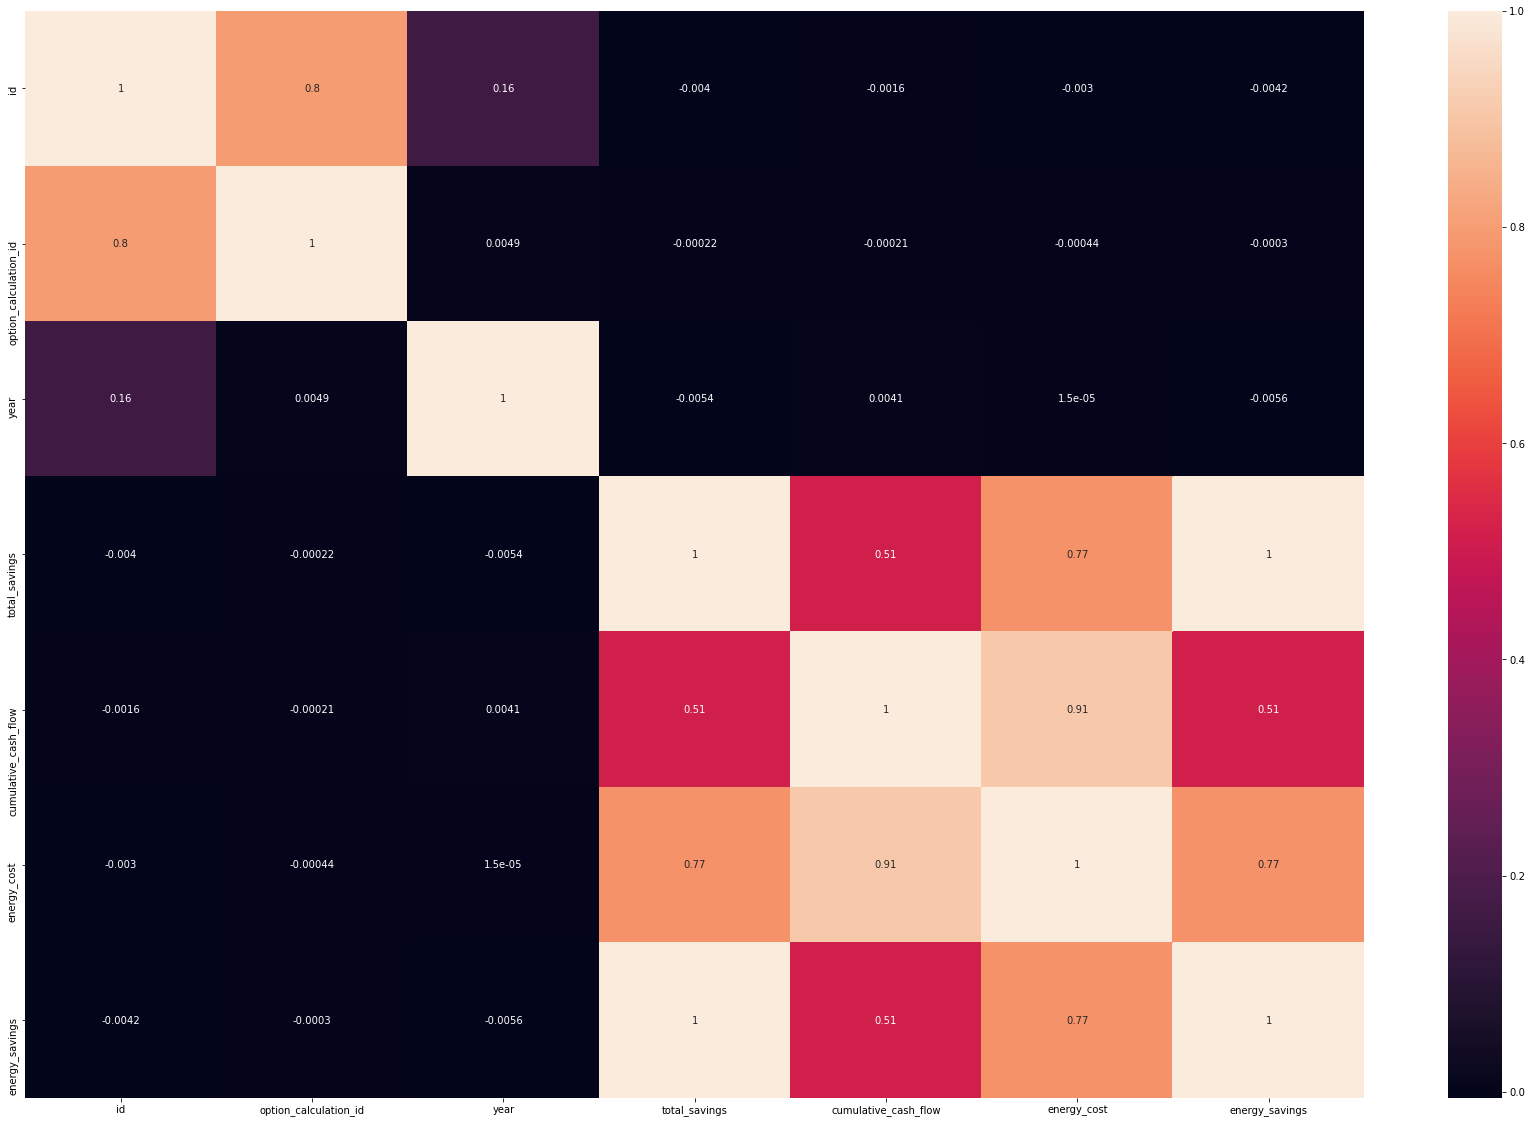

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

df_new=df[df.columns]
plt.figure(figsize=(30,20))

sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df_new.corr(), annot=True)